# Step Counter

<IPython.core.display.Javascript object>


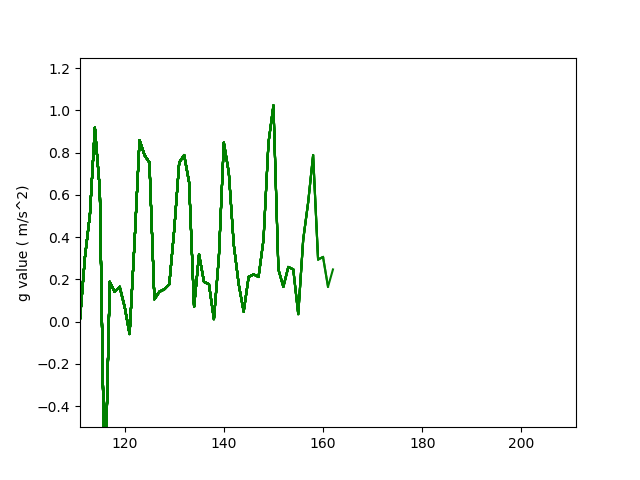

Adım Sayısı : 1
Adım Sayısı : 2
Adım Sayısı : 2
Adım Sayısı : 3
Adım Sayısı : 4
Adım Sayısı : 6
Adım Sayısı : 6
Adım Sayısı : 7
Adım Sayısı : 8
Adım Sayısı : 9
Adım Sayısı : 10
Adım Sayısı : 11
Adım Sayısı : 12
Adım Sayısı : 13
Adım Sayısı : 14
Adım Sayısı : 15
Adım Sayısı : 20
Adım Sayısı : 21
Adım Sayısı : 22
Adım Sayısı : 23
Adım Sayısı : 24
Adım Sayısı : 25
Adım Sayısı : 26
Adım Sayısı : 27


SerialException: Attempting to use a port that is not open

In [1]:
import serial             # Gerekli kütüphaneler eklenmesi
import time
import numpy as np  
import matplotlib.pyplot as plt 
import peakutils
from peakutils.plot import plot as pplot
%matplotlib notebook                     


serial_communication = serial.Serial('COM1', baudrate = 9600, timeout = 1)  # Seri haberleşme için port tanımlanması 
time.sleep(3)              # 3 saniye delay 
numPoints = 3              # 3 farklı eksen verimiz olduğu için 
dataList = [0]*numPoints   # x y z değerleri için 3 sutünlü liste oluşturuyoruz.

# çizdirilecek figure için ayarlamalar yapıldı
fig = plt.figure()           
fig.show()   
plt.ylabel("g value ( m/s^2)")  # y label eklendi

# Hesaplanan x y z (ivme) değerlerini kaydetmek için boş liste olusturuldu.
x_g_value = []     
y_g_value = []
z_g_value = []

# Kalibrasyon değerleri için ölçülen maksimum ve minimum değerler.
xUp   =  256
xDown = -254
yUp   =  256
yDown = -255
zUp   =  279
zDown = -489

## +2g için dönüşüm değeri
conversion_factor = 0.0039 
n = []          #  grafiği cizdirmek için indis vektörü         
k = 0
i = 0
steps = 0      # adım sayımız
step_hold = 0  # while döngüsünde her tekrarda adım sayımızı karşılaştırmak için oluşturulmuş değer

# İvme değerlerinin maximum ve minumum alacağı degerler
xUp1g   = xUp * conversion_factor
xDown1g = xDown * conversion_factor
yUp1g   = yUp * conversion_factor
yDown1g = yDown * conversion_factor
zUp1g   = zUp * conversion_factor
zDown1g = zDown * conversion_factor


# offSet ve Gain değerlerimiz
xOffset = 0.5 * (xUp1g + xDown1g)
xGain   = 0.5 * (xUp1g - xDown1g)
yOffset = 0.5 * (yUp1g + yDown1g)
yGain   = 0.5 * (yUp1g - yDown1g)
zOffset = 0.5 * (zUp1g + zDown1g)
zGain   = 0.5 * (zUp1g - zDown1g)


def getValues(): # Seri haberleşme ile arduinodan veri almak için fonksiyon tanımlanması
    arduinoData = serial_communication.readline().decode().split('\r\n')
    # gelen verilerdeki gereksiz char'lardan kurtulduk.
    return arduinoData[0]
    
while(1):
    
    for i in range(0,numPoints):
            
        data = getValues()  # gelen verileri data değerine atıyoruz
        data = int(data)    # gelen verileri integer'e çevirdik
        dataList[i] = data   #gelen integer değerlerini listemize kaydettik.
        
        x_new = float( dataList[0])  # sutünların parçalanması.    
        y_new = float( dataList[1])  
        z_new = float( dataList[2]) 
            
        x_new = (x_new*conversion_factor - xOffset)  / xGain  # Kalibrasyon değerlerinin uygulanarak
        y_new = (y_new*conversion_factor - yOffset)  / yGain  # açı değerlerini ivmeye dönüştürülmesi
        z_new = (z_new*conversion_factor - zOffset)  / zGain
            
     # Gelen ivme değerlerini grafikte rahat görebilmek için 0' a çekilmesi. fftshift gibi.
     # 3 ile çarpılmasının nedeni ise hassasiyetin arttırılması.
    x_g_value.append((x_new - 3.0)   * 3.0) 
    # Grafik olarak çizdirilmesi
    n.append(k)
    plt.plot(n, x_g_value,color='g')
    fig.canvas.draw()
    # Grafik sınır değerlerinin belirlenmesi.
    plt.xlim(left=max(0, k-50), right=k+50)  
    plt.ylim(-0.5,1.25)
    
    # indexex fonksiyonu için ilk parametrenin array olması lazımdır. Bu yüzden  listeyi arraya çevirilmesi.   
    array = np.asarray(x_g_value)
    # Grafiğin tepe noktalarının bulunması için indexes fonksiyonun çağırılması
    indexes = peakutils.indexes(array , thres=0.5, min_dist=3) # Max genlik = 0.5 Değerler arası uzaklık=3
     
    steps = len(indexes)  # kaç tepesi olduğunu steps değerine atama
    if steps > step_hold : # her döngüde adım sayısını yazdırmamak için karşılaştırma
        print("Adım Sayısı :" , steps)  # adım sayısını yazdırma
            
        
    # Sınırlı değer için test grafigi çizdirme (istenilirse sınırsız alınabılır)   
    u= len(x_g_value)                   # listemizin uzunluğunu belirleme 
    if u >162:                       # 100 nokta olucak şekilde hesaplanması
        serial_communication.close()   # Seri haberleşmesinin durdurulması
                 
    plt.pause(0.001)
    k += 1
    i+= 1
    step_hold = steps                   # Bir sonraki döngü için adım değerinin tutulması.

## Gürültü İşaretimizin Çizdirilmesi 

 Adım Sayısı :  20


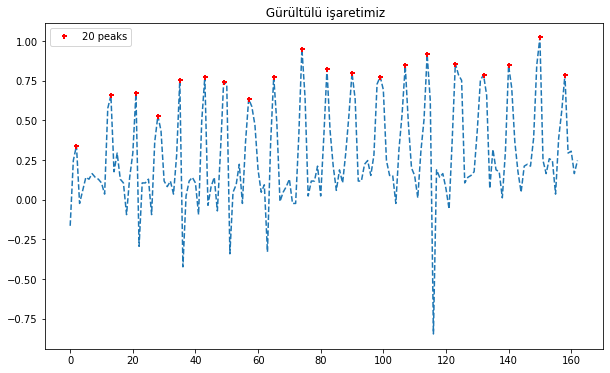

In [2]:
# Tepe noktası değerlerinin grafikte ayrıntılı gösterimi.
from matplotlib import pyplot  

array = np.array(x_g_value)
a= np.asarray(n)
indexes = peakutils.indexes(array, thres=0.60, min_dist=3)

pyplot.figure(figsize=(10,6))
pplot(a, array, indexes)
plt.title(" Gürültülü işaretimiz")

steps = len(indexes)
print(" Adım Sayısı : " , steps)

##  İşaretin Fourieri'nin alınması 

<IPython.core.display.Javascript object>


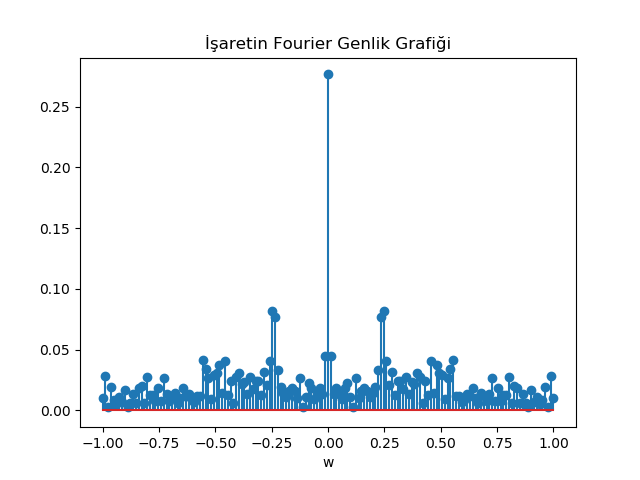

In [11]:
N=163     # nokta sayısı belirlendi
w=np.linspace(-np.pi , np.pi ,N)  # -pi den +pi ye N noktalı bir omega oluşturuldu
x1w=np.fft.fft(x_g_value,N)/N       #  işaretin fft ' sinin alınması'
x1w1 = np.fft.fftshift(x1w)           # aldığımız fft yi omega ekseninde 0' a kaydırılması
plt.figure()
plt.stem(w/np.pi,np.abs(x1w1),use_line_collection = True)
plt.title("İşaretin Fourier Genlik Grafiği")
plt.xlabel("w")
plt.show()


#   Filtre Kısmı

In [20]:
# Gerekli kütüphanelerin eklenmesi
import scipy.signal as sgnl
%matplotlib notebook
from scipy.fftpack import fft, ifft
from scipy.io import loadmat

<IPython.core.display.Javascript object>


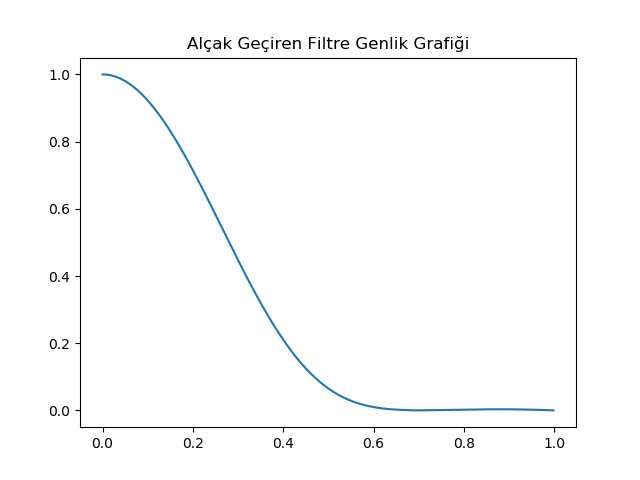

<IPython.core.display.Javascript object>


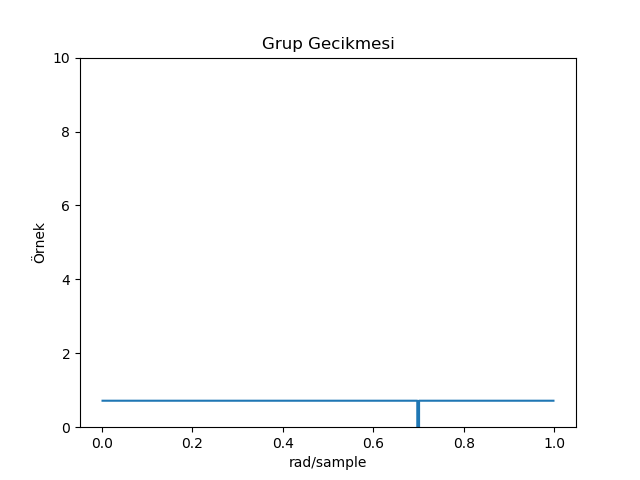

(0, 10)

In [49]:
filter_data = loadmat('filter.mat')         # Alçak geçiren filtrenin koda çağırılması   

# Fİltredeki değerlerin a ve b değişkenine atanması
Coeffs = filter_data['ba'].astype(np.float)   
b = Coeffs[:,0]       
a = np.array([1])        
w, Hw = sgnl.freqz(b,a)   

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))   # Genlik ve faz degerlerini atanma


plt.figure()
plt.plot(w/np.pi, Hw_mag)
plt.title("Alçak Geçiren Filtre Genlik Grafiği")

plt.figure()
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.plot(w[1::]/np.pi,tau_w)
plt.title("Grup Gecikmesi")
plt.xlabel("rad/sample")
plt.ylabel("Örnek")
plt.ylim([0,10])


<IPython.core.display.Javascript object>


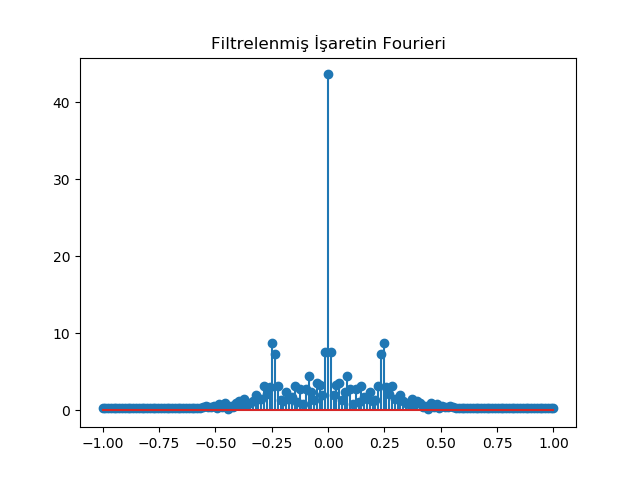

In [50]:
y = sgnl.lfilter(b, a, x_g_value)      # Sinyalimizi filtreye soktuk.    

y_w = np.fft.fft(y)                 # Filtrelenmiş İşaretin fourierini aldık
y_w = np.fft.fftshift(y_w)               # aldığımız fourieri omega ekseninde 0 a kaydırdık.
w=np.linspace(-np.pi , np.pi,N)

plt.figure()
plt.stem(w/np.pi , np.abs(y_w) , use_line_collection = True)
plt.title("Filtrelenmiş İşaretin Fourieri")
plt.show()

<IPython.core.display.Javascript object>


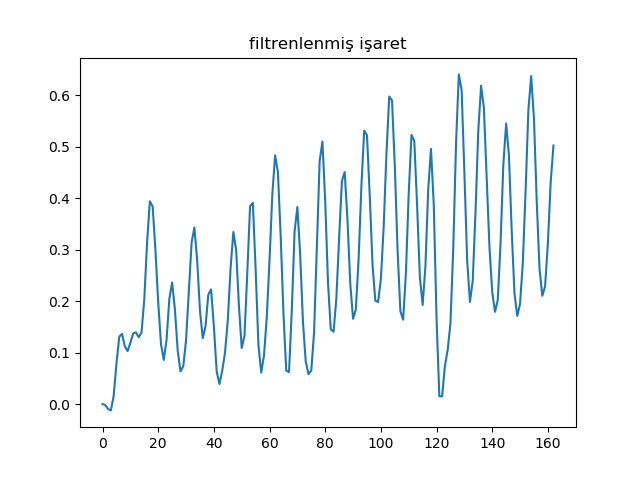

In [51]:
plt.figure()
plt.plot(y)
plt.title("filtrenlenmiş işaret")
plt.show()

<IPython.core.display.Javascript object>


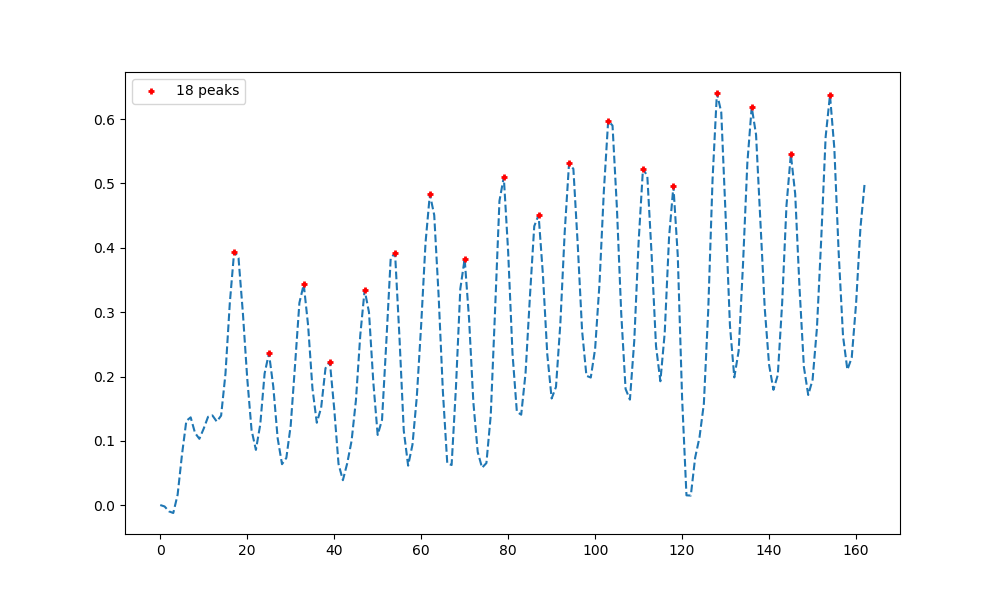

 Adım Sayısı :  18


In [52]:
indexes = peakutils.indexes(y, thres=0.3, min_dist=1)
pyplot.figure(figsize=(10,6))
a= np.asarray(n)
pplot(a, y, indexes)

steps = len(indexes)
print(" Adım Sayısı : " , steps)